
METAHEURISTICA 


    Autor: GABRIEL MELCHOR CAMPOS
    

Lectura el dataset

In [1]:
import pandas as pd
import re
import random
from unicodedata import normalize
from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec
import numpy as np
import time
from multiprocessing import Pool

In [2]:
#Importamos pandas
import pandas as pd
#Leemos el dataset
df = pd.read_csv('Suicide_Detection.csv')
#Mostramos las primeras filas
df.head(10)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,11,Honetly idkI dont know what im even doing here...,suicide
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide
7,13,It ends tonight.I can’t do it anymore. \nI quit.,suicide
8,16,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,My life is over at 20 years oldHello all. I am...,suicide


Limpieza de datos

In [3]:
#Funcion auxiliar de limpieza
import re
def Limpiador(text):
    # Remover tags de html
    text = re.sub('<[^<]*>','',text)
    
    # Almacenar temporalmente los emoticons
    emoticons = ''.join(re.findall('[:;=]-+[\)\(pPD]+',text))
    
    # Elimine los caracteres que no son palabras y combinar los emoticones
    text = re.sub('\W+',' ',text.lower()) + emoticons.replace('-','')
    
    return text

In [4]:
#Funcion para remover emojis
def RemoverEmoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [5]:
#Aplicamos los limpiadores
df['text'] = df['text'].apply(Limpiador)

In [6]:
#Remover Emojis
df['text']=df['text'].apply(lambda x: RemoverEmoji(x))

In [7]:
#Normalizar a utf-8, remover acentos
from unicodedata import normalize

RemoverAcentos = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["text"] = df["text"].apply(RemoverAcentos)

In [8]:
#Mostramos datos limpios
df.head(10)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,suicide
1,3,am i weird i don t get affected by compliments...,non-suicide
2,4,finally 2020 is almost over so i can never hea...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,i m so losthello my name is adam 16 and i ve b...,suicide
5,11,honetly idki dont know what im even doing here...,suicide
6,12,trigger warning excuse for self inflicted bur...,suicide
7,13,it ends tonight i can t do it anymore i quit,suicide
8,16,everyone wants to be edgy and it s making me s...,non-suicide
9,18,my life is over at 20 years oldhello all i am ...,suicide


In [9]:
#importamos el toolkit de procesamiento de lenguaje natural
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Las palabras vacías son palabras comunes que a menudo se eliminan de los textos durante el análisis de texto porque no aportan mucho significado en sí mismas. Ejemplos de palabras vacías en inglés incluyen "a", "an", "the", "in", "on", "of", etc.

In [10]:
#Importamos stopwords
from nltk.corpus import stopwords
#Seleccionamos el lenguaje
stop = stopwords.words('english')

In [11]:
#Importamos el tokenizador de palabras
from nltk import word_tokenize
#Seleccioanmos idioma
stop_words = set(stopwords.words('english'))
#Seleccionamos la columna de review
corpora = df["text"].values
#Tokenizamos todas las entradas del dataset en review
tokenized = [word_tokenize(corpus) for corpus in corpora]

In [12]:
# Tokenización y eliminación de stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words])

# Eliminamos las palabras de tamaño 1
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if len(word) > 1])


In [13]:
#Eliminamos los stopwords de todas las entradas del dataset que ya ha sido tokenizado
tokens_sin_stopwords = [[word for word in sublist if word.lower() not in stop_words] for sublist in tokenized]

In [14]:
#Eliminamos las palabras de tamaño 1
tokenized_final = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokens_sin_stopwords]

In [15]:
#Mostramos un ejemplo tokenizado y sin stopwords
print(tokenized_final[2222])

['really', 'fucking', 'hate', 'class', '9th', 'grade', 'btw', 'never', 'really', 'liked', 'much', 'could', 'hang', 'much', 'amount', 'casual', 'racism', 'shitty', 'stuff', 'said', 'really', 'care', 'much', 'cause', 'care', 'tbh', 'biracial', 'btw', 'apparently', 'makes', 'black', 'something', 'according', 'anyone', 'native', 'country', 'immigrant', 'word', 'sorts', 'racial', 'slurs', 'said', 'regularly', 'starting', 'piss', 'non', 'confrontational', 'person', 'keep', 'quiet', 'god', 'dying', 'inside', 'whenever', 'hell', 'open', 'mouths', 'make', 'mean', 'comments', 'make', 'fun', 'people', 'appearances', 'time', 'real', 'life', 'even', 'watching', 'someone', 'movie', 'documentary', 'stop', 'respectful', 'gods', 'sake', 'disrespect', 'teachers', 'respect', 'privacy', 'searching', 'teachers', 'google', 'search', 'history', 'personal', 'pc', 'around', 'make', 'fun', 'muslim', 'teachers', 'religion', 'course', 'racial', 'slurs', 'never', 'face', 'course', 'cause', 'wan', 'na', 'get', 'tro

In [16]:
# Funciones de carga y procesamiento de datos
def cargar_datos_csv(nombre_archivo):
    df = pd.read_csv(nombre_archivo)
    num_registros = len(df)
    return df, num_registros

In [17]:
def cargas(sumaFinal, tamaño_ventana):
    numeros_random = []
    suma = 0
    while suma < sumaFinal:
        numeroA = random.randint(1, 30)  # Modificado para que sea de 1 a 30
        if suma + numeroA > sumaFinal:
            numeros_random.append(sumaFinal - suma)
            break
        else:
            numeros_random.append(numeroA)
            suma = sum(numeros_random)
    if len(numeros_random) % tamaño_ventana != 0:
        resto = len(numeros_random) % tamaño_ventana
        if resto != 0:
            elementos_faltantes = tamaño_ventana - resto
            numeros_random.extend([0] * elementos_faltantes)
    return numeros_random

In [18]:
def generar_poblacion(num_individuos, tamaño_ventana):
    poblacion = []
    for _ in range(num_individuos):
        individuo = [random.uniform(1, tamaño_ventana) for _ in range(tamaño_ventana)]
        poblacion.append(individuo)
    return poblacion

In [19]:
def calcular_fitness(asignacion_procesos, maxspan):
    utilizacion_procesadores = []
    for procesos in asignacion_procesos.values():
        carga_total = sum(procesos)
        utilizacion = carga_total / maxspan
        utilizacion_procesadores.append(utilizacion)

    apu = sum(utilizacion_procesadores) / len(utilizacion_procesadores)
    fitness = (1 / maxspan) * apu
    return fitness

In [20]:
def seleccion_por_ruleta(poblacion, fitness_poblacion):
    total_fitness = sum(fitness_poblacion)
    probabilidad_seleccion = [fit / total_fitness for fit in fitness_poblacion]
    papa1 = random.choices(poblacion, weights=probabilidad_seleccion)[0]
    papa2 = random.choices(poblacion, weights=probabilidad_seleccion)[0]
    return papa1, papa2

In [21]:
def mutacion(individuo, tasa_mut):
    if random.random() < tasa_mut:
        idx1, idx2 = random.sample(range(len(individuo)), 2)
        individuo[idx1], individuo[idx2] = individuo[idx2], individuo[idx1]
    return individuo

In [22]:
def cruzamiento(papa1, papa2, tasa_cruz, tasa_mut):
    if random.random() < tasa_cruz:
        punto_de_cruce = random.randint(1, len(papa1) - 1)

        hijo1 = papa1[:punto_de_cruce] + [x for x in papa2 if x not in papa1[:punto_de_cruce]]
        hijo2 = papa2[:punto_de_cruce] + [x for x in papa1 if x not in papa2[:punto_de_cruce]]
    else:
        hijo1 = papa1
        hijo2 = papa2

    return mutacion(hijo1, tasa_mut), mutacion(hijo2, tasa_mut)

In [23]:
def conversion(individuo, carga, tamaño_ventana, num_procesadores):
    asignacion_procesos = {i + 1: [] for i in range(num_procesadores)}
    indices = list(map(int, individuo))  # No se usa split() porque `individuo` es una lista
    x = 0
    while x < len(carga):
        for i, indice in enumerate(indices):
            clave = (i % num_procesadores) + 1
            asignacion_procesos[clave].append(carga[(indice - 1) + x])
        x = x + tamaño_ventana
    maxspan = max(sum(procesos) for procesos in asignacion_procesos.values())
    fitness = calcular_fitness(asignacion_procesos, maxspan)
    return asignacion_procesos, fitness

In [24]:
def slide_window(procesos, size_w):
    ventanas = []
    for i in range(0, len(procesos), size_w):
        ventana = procesos[i:i + size_w]
        if len(ventana) < size_w:
            ventana += [0] * (size_w - len(ventana))
        ventanas.append(ventana)
    return ventanas


In [25]:
def calcular_estadisticas_procesadores(asignacion_procesos):
    colas_procesadores = [procesos for procesos in asignacion_procesos.values()]
    media_procesadores = sum(map(sum, colas_procesadores)) / len(colas_procesadores)
    max_cola = max(sum(procesos) for procesos in asignacion_procesos.values())
    return colas_procesadores, media_procesadores, max_cola

In [26]:
def imprimir_colas_procesadores(colas_procesadores):
    for i, cola in enumerate(colas_procesadores):
        print(f"Procesador {i} = {sum(cola)}")


In [27]:
def entrenar_word2vec(data_chunk):
    model = Word2Vec(sentences=data_chunk, vector_size=100, window=5, min_count=1, workers=8)
    return model

In [33]:
# Configuración de parámetros  
num_procesadores= 8 
tamaño_ventana = 16  
num_individuos = 10
num_generaciones = 50
tasa_mut = 0.1
tasa_cruz = 0.8

In [34]:
def distribuir_y_entrenar_word2vec(num_procesadores, df, tamaño_ventana, num_individuos, num_generaciones, tasa_mut, tasa_cruz):
    tiempos_entrenamiento = []

    for procesadores in range(2, num_procesadores + 1):
        mejor_asignacion_global = None
        mejor_carga_global = float('-inf')
        num_registros = len(df)

        carga = cargas(num_registros, tamaño_ventana)
        poblacion = generar_poblacion(num_individuos, tamaño_ventana)

        for generacion in range(num_generaciones):
            fitness_poblacion = []
            nueva_poblacion = []

            for individuo in poblacion:
                asignacion, _ = conversion(individuo, carga, tamaño_ventana, procesadores)
                carga_procesadores = [sum(procesos) for procesos in asignacion.values()]
                max_carga_procesador = max(carga_procesadores)

                if max_carga_procesador > mejor_carga_global:
                    mejor_carga_global = max_carga_procesador
                    mejor_asignacion_global = asignacion.copy()

                fitness = calcular_fitness(asignacion, max_carga_procesador)
                fitness_poblacion.append(fitness)
                nueva_poblacion.append(mutacion(individuo, tasa_mut))

            poblacion = nueva_poblacion

        tiempo_inicio = time.time()
        word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=procesadores)
        tiempo_fin = time.time()

        tiempo_transcurrido = tiempo_fin - tiempo_inicio
        print(f"Tiempo de entrenamiento de Word2Vec con {procesadores} procesadores: {tiempo_transcurrido} segundos")

        tiempos_entrenamiento.append((procesadores, tiempo_transcurrido))

    return tiempos_entrenamiento

# Obtener los tiempos de entrenamiento
tiempos_entrenamiento = distribuir_y_entrenar_word2vec(num_procesadores, df, tamaño_ventana, num_individuos, num_generaciones, tasa_mut, tasa_cruz)

# Imprimir los resultados
for procesadores, tiempo in tiempos_entrenamiento:
    print(f"{procesadores} procesadores: {tiempo} s")


Tiempo de entrenamiento de Word2Vec con 2 procesadores: 84.96683311462402 segundos
Tiempo de entrenamiento de Word2Vec con 3 procesadores: 68.050042390823364 segundos
Tiempo de entrenamiento de Word2Vec con 4 procesadores: 58.85554122924805 segundos
Tiempo de entrenamiento de Word2Vec con 5 procesadores: 43.41162467002869 segundos
Tiempo de entrenamiento de Word2Vec con 6 procesadores: 32.14200282096863 segundos
Tiempo de entrenamiento de Word2Vec con 7 procesadores: 24.61114430427551 segundos
Tiempo de entrenamiento de Word2Vec con 8 procesadores: 23.874298095703125 segundos
2 procesadores: 84.96683311462402 s
3 procesadores: 68.050042390823364 s
4 procesadores: 58.85554122924805 s
5 procesadores: 43.41162467002869 s
6 procesadores: 32.14200282096863 s
7 procesadores: 24.61114430427551 s
8 procesadores: 23.874298095703125 s


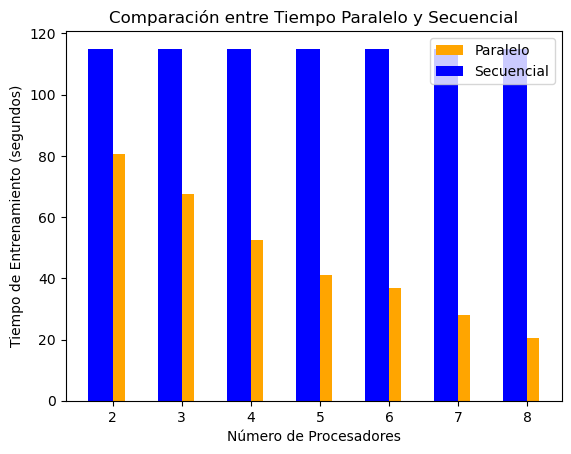

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Tiempo secuencial
tiempo_secuencial = 115 # Reemplaza esto con tu tiempo secuencial real

# Supongamos que tienes una lista llamada tiempos_entrenamiento con tuplas (num_procesadores, tiempo_transcurrido)
tiempos_entrenamiento = [(2, 80.7583224773407), (3, 67.44052290916443), (4, 52.599225997924805),
                         (5, 41.10544490814209), (6, 36.690492391586304), (7, 28.06205987930298), (8, 20.52948069572449)]

# Extraer datos para el gráfico
num_procesadores, tiempos = zip(*tiempos_entrenamiento)

# Crear gráfico de barras
fig, ax = plt.subplots()
bar_width = 0.35
bar_positions = np.arange(len(num_procesadores))

# Barra para el tiempo de entrenamiento paralelo (en azul)
bars_paralelo = ax.bar(bar_positions, tiempos, bar_width, label='Paralelo', color='orange')

# Barra para el tiempo secuencial (en naranja)
bars_secuencial = ax.bar(bar_positions - bar_width / 2, [tiempo_secuencial] * len(num_procesadores),
                         bar_width, label='Secuencial', color='blue')

# Agregar etiquetas y título
ax.set_xlabel('Número de Procesadores')
ax.set_ylabel('Tiempo de Entrenamiento (segundos)')
ax.set_title('Comparación entre Tiempo Paralelo y Secuencial')
ax.set_xticks(bar_positions)
ax.set_xticklabels(num_procesadores)
ax.legend()

# Mostrar la gráfica
plt.show()


Optimizacion de word2vec con 8 procesadores para ver comportamiento segun su numero de tweets

In [36]:
tamaño_ventana = 16  
num_individuos = 10
num_generaciones = 50
tasa_mut = 0.1
tasa_cruz = 0.8

def distribuir_y_word2vec(num_procesadores, df, tamaño_ventana, num_individuos, num_generaciones, tasa_mut, tasa_cruz):
    mejor_asignacion_global = None
    mejor_carga_global = float('-inf')
    num_registros = len(df) 
    num_procesadores = 8

    while num_procesadores <= 8:
        carga = cargas(num_registros, tamaño_ventana)
        poblacion = generar_poblacion(num_individuos, tamaño_ventana)

        for generacion in range(num_generaciones):
            fitness_poblacion = []
            nueva_poblacion = []

            for individuo in poblacion:
                asignacion, _ = conversion(individuo, carga, tamaño_ventana, num_procesadores)
                carga_procesadores = [sum(procesos) for procesos in asignacion.values()]
                max_carga_procesador = max(carga_procesadores)

                if max_carga_procesador > mejor_carga_global:
                    mejor_carga_global = max_carga_procesador
                    mejor_asignacion_global = asignacion.copy()

                fitness = calcular_fitness(asignacion, max_carga_procesador)
                fitness_poblacion.append(fitness)
                nueva_poblacion.append(mutacion(individuo, tasa_mut))

            poblacion = nueva_poblacion

            # (Impresiones y procesamientos adicionales que desees realizar por generación)
            #print(f"\nGeneración: {generacion + 1}")
            #print("Detalles de la asignación de procesos:")
            #for i, procesos in mejor_asignacion_global.items():
             #   print(f"Procesador {i} = {sum(procesos)}")
            #print(f"Media de las cargas de procesadores: {sum(carga_procesadores) / len(carga_procesadores)}")
            #print(f"Mayor carga encontrada: {mejor_carga_global}")

        num_procesadores += 1

    # Utilizar la mejor asignación global para el entrenamiento de Word2Vec
    if mejor_asignacion_global is not None:
        tiempo_inicio = time.time()
        word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=num_procesadores)
        tiempo_fin = time.time()

        tiempo_transcurrido = tiempo_fin - tiempo_inicio
        print(f"\nTiempo de entrenamiento de Word2Vec: {tiempo_transcurrido} segundos")

    return word2vec_model  # Devolver el modelo entrenado


# Obtener el modelo Word2Vec entrenado
word2vec_model = distribuir_y_word2vec(num_procesadores, df, tamaño_ventana, num_individuos, num_generaciones, tasa_mut, tasa_cruz)


Tiempo de entrenamiento de Word2Vec: 28.21808743476868 segundos


In [37]:
import time
from gensim.models import Word2Vec
num_procesadores = 8

# Definir la función para medir el tiempo de entrenamiento
def medir_tiempo_entrenamiento(num_tweets, word2vec_model, df):
    # Seleccionar una muestra de tweets
    tweets_muestra = df['tokens'].iloc[:num_tweets].tolist()

    tiempo_inicio = time.time()
    word2vec_model.train(tweets_muestra, total_examples=len(tweets_muestra), epochs=word2vec_model.epochs)
    tiempo_fin = time.time()

    tiempo_transcurrido = tiempo_fin - tiempo_inicio
    return tiempo_transcurrido

#cantidad de tweets a procesar
tweets_a_procesar = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000]

# Medir el tiempo de entrenamiento para cada cantidad de tweets
for num_tweets in tweets_a_procesar:
    tiempo_entrenamiento = medir_tiempo_entrenamiento(num_tweets, word2vec_model, df)
    print(f"Con {num_tweets} tweets: {tiempo_entrenamiento} seg")

Con 10000 tweets: 1.311701774597168 seg
Con 20000 tweets: 2.4636731147766113 seg
Con 30000 tweets: 3.7691683769226074 seg
Con 40000 tweets: 5.145769834518433 seg
Con 50000 tweets: 6.14773416519165 seg
Con 60000 tweets: 7.553819417953491 seg
Con 70000 tweets: 8.553730487823486 seg
Con 80000 tweets: 9.740924596786499 seg
Con 90000 tweets: 10.888047695159912 seg
Con 100000 tweets: 12.155096769332886 seg
Con 200000 tweets: 24.158611059188843 seg


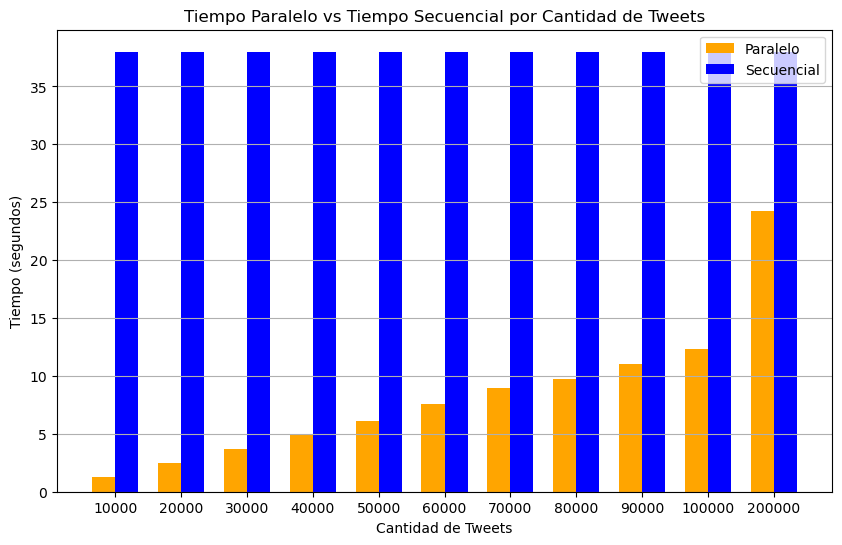

In [38]:
import matplotlib.pyplot as plt
import numpy as np

tiempo_secuencial = 38

# Tiempos paralelos obtenidos
tweets_a_procesar = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000]
tiempos_paralelos = [1.2781953811645508, 2.4485650062561035, 3.7118237018585205, 4.880297899246216, 
                     6.092125177383423, 7.561915159225464, 8.922825813293457, 9.759102582931519, 
                     11.06895136833191, 12.360910177230835, 24.28256916999817]

ancho_barra = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
barra_paralela = ax.bar(np.arange(len(tweets_a_procesar)), tiempos_paralelos, width=ancho_barra, label='Paralelo', color='orange')
barra_secuencial = ax.bar(np.arange(len(tweets_a_procesar)) + ancho_barra, [tiempo_secuencial] * len(tweets_a_procesar), width=ancho_barra, label='Secuencial', color='blue')

#gráfica
ax.set_xticks(np.arange(len(tweets_a_procesar)) + ancho_barra / 2)
ax.set_xticklabels(tweets_a_procesar)
ax.set_title('Tiempo Paralelo vs Tiempo Secuencial por Cantidad de Tweets')
ax.set_xlabel('Cantidad de Tweets')
ax.set_ylabel('Tiempo (segundos)')
ax.legend()
ax.grid(axis='y')

plt.show()


In [39]:
# Función para convertir texto a vectores usando Word2Vec
def text_to_vectors(text, word2vec_model):
    vectors = [word2vec_model.wv[word] for word in text if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

print("\nVectores para los primeros 5 datos en el conjunto de entrenamiento:")
for index, row in df.head(5).iterrows():
    vector = text_to_vectors(row['tokens'], word2vec_model)
    print(f"Dato {index + 1} - Vector: {vector}")

print("\nSe han generado los vectores para los primeros 5 datos en el conjunto del word2vec.")



Vectores para los primeros 5 datos en el conjunto de entrenamiento:
Dato 1 - Vector: [-0.16432947 -0.17327309 -0.61434263  0.44026953  0.05820833  0.784133
 -0.35785967 -0.68639666  0.1822196   0.9459795  -0.5712038  -0.25837627
  0.35807592  0.2498178   0.6153931  -0.29495803  0.28817937  0.58066434
 -0.44355023  0.3635445  -0.8662003  -0.4629706   0.54392666 -0.4141743
 -0.41987476 -0.5765817   1.0110871   0.89348525  0.56611687 -0.45833626
  0.20740475 -1.0060531   0.09150474  0.33041313  0.39930576 -1.0404369
 -0.5319017   0.69356436  0.00395907  0.42667395 -0.19017701 -0.1821837
 -0.22136064  0.2658463  -0.08173977  0.26098213  0.2808848  -0.21488668
 -0.48467308 -0.2611486   0.6347406  -0.3563019   0.7472623   0.34114966
  0.48987514  0.3460893   0.1331067   0.5580865   0.19045456 -0.6556156
  0.0277957  -0.3206683  -0.02884484 -0.9468036  -0.607926   -0.2696667
  0.05238795  0.27230403 -0.0828352   0.23058662  0.8026477  -0.48250702
 -0.12473752  0.09020808 -0.46853843  0.12047

Librerias para los modelos de machine learning

In [40]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

Linea donde se entrena comn 80% y 20% de test para todos los modelos de machine learning

In [41]:
# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(df['tokens'], df['class'], test_size=0.2, random_state=42)

# Aplicar la función de conversión a vectores a los conjuntos de entrenamiento y prueba
X_train_word2vec = X_train.apply(lambda x: text_to_vectors(x, word2vec_model))
X_test_word2vec = X_test.apply(lambda x: text_to_vectors(x, word2vec_model))

Bosques aleatorios

In [42]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_word2vec.tolist(), y_train)
rf_predictions = rf_model.predict(X_test_word2vec.tolist())
rf_accuracy = accuracy_score(y_test, rf_predictions)

#Matriz de confusion
conf_matrix = confusion_matrix(y_test, rf_predictions)
# Error global
error = 1 - rf_accuracy
# Imprimir resultados
print("Matriz de confusión:")
print(conf_matrix)
print("\nError global:")
print(error)

print(f"Random Forest Accuracy: {rf_accuracy}")

Matriz de confusión:
[[21597  1690]
 [ 2033 21095]]

Error global:
0.02544814
Random Forest Accuracy: 0.9745518613594744


KNN

In [43]:
# k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_word2vec.tolist(), y_train)
knn_predictions = knn_model.predict(X_test_word2vec.tolist())
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
# Error global
error_knn = 1 - knn_accuracy
# Imprimir resultados
print("Matriz de confusión k-NN:")
print(conf_matrix_knn)
print("\nError global k-NN:")
print(error_knn)


print(f"k-NN Accuracy: {knn_accuracy}")

Matriz de confusión k-NN:
[[18705  4582]
 [  725 22403]]

Error global k-NN:
0.017483037272435
k-NN Accuracy: 0.9825169627275665


Adaboost

In [44]:
# AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train_word2vec.tolist(), y_train)
adaboost_predictions = adaboost_model.predict(X_test_word2vec.tolist())
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)

# Matriz de confusión
conf_matrix_adaboost = confusion_matrix(y_test, adaboost_predictions)
# Error global
error_adaboost = 1 -adaboost_accuracy
# Imprimir resultados
print("Matriz de confusión AdaBoost:")
print(conf_matrix_adaboost)
print("\nPrecisión global AdaBoost:")
print(adaboost_accuracy)
print("\nError global AdaBoost:")
print(error_adaboost)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")

Matriz de confusión AdaBoost:
[[20958  2329]
 [ 1988 21140]]

Precisión global AdaBoost:
0.9505162743725089

Error global AdaBoost:
0.049483725627492
AdaBoost Accuracy: 0.9505162743725089


Tabla comparativa de los modelos de machine learning

In [45]:
import pandas as pd

# Crear un DataFrame con los resultados de cada modelo
data = {
    'Modelo': ['Random Forest', 'k-NN', 'AdaBoost'],
    'Precisión': [rf_accuracy, knn_accuracy, adaboost_accuracy],
    'Sensibilidad': [(conf_matrix[1, 1] / sum(conf_matrix[1, :])), (conf_matrix_knn[1, 1] / sum(conf_matrix_knn[1, :])), (conf_matrix_adaboost[1, 1] / sum(conf_matrix_adaboost[1, :]))],
    'Especificidad': [(conf_matrix[0, 0] / sum(conf_matrix[0, :])), (conf_matrix_knn[0, 0] / sum(conf_matrix_knn[0, :])), (conf_matrix_adaboost[0, 0] / sum(conf_matrix_adaboost[0, :]))],
    'FPR': [conf_matrix[0, 1] / sum(conf_matrix[0, :]), conf_matrix_knn[0, 1] / sum(conf_matrix_knn[0, :]), conf_matrix_adaboost[0, 1] / sum(conf_matrix_adaboost[0, :])],
}

df_resultados = pd.DataFrame(data)

# Imprimir la tabla comparativa
print("Tabla Comparativa de Modelos:")
print(df_resultados.to_string(index=False))


Tabla Comparativa de Modelos:
       Modelo  Precisión  Sensibilidad  Especificidad      FPR
Random Forest   0.974551      0.912098       0.927427 0.072573
         k-NN   0.982516      0.968653       0.803238 0.196762
     AdaBoost   0.950516      0.914044       0.899987 0.100013
